## EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create dataframe to read dataset
data = pd.read_csv("datasets_56485_108594_Breast_cancer_data.csv")
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
#check dataframe structure like columns and its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
# check the number of rows and columns in dataframe
data.shape

(569, 6)

In [6]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [80]:
# checking null values
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

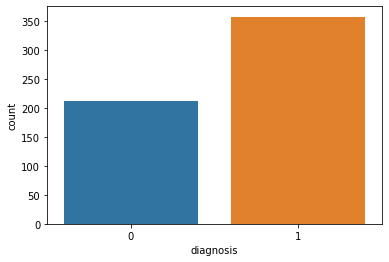

In [7]:
## now we will see how different parameters are interrelated
sns.countplot(data['diagnosis'])

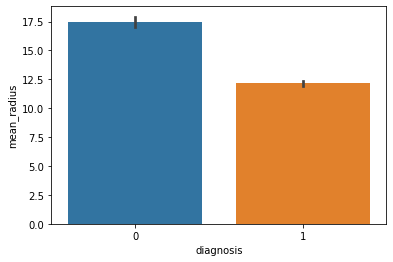

In [8]:
# feature mean radius
sns.barplot(x=data['diagnosis'], y=data['mean_radius'], data=data)

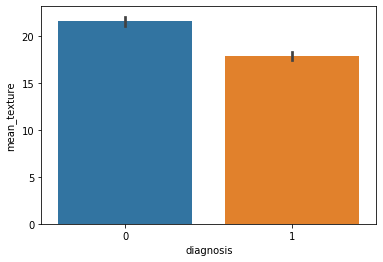

In [9]:
# feature mean texture
sns.barplot(x=data['diagnosis'], y=data['mean_texture'], data=data)

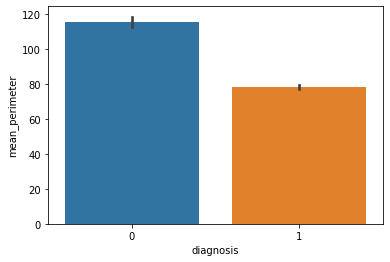

In [10]:
# feature mean perimeter
sns.barplot(x=data['diagnosis'], y=data['mean_perimeter'], data=data)

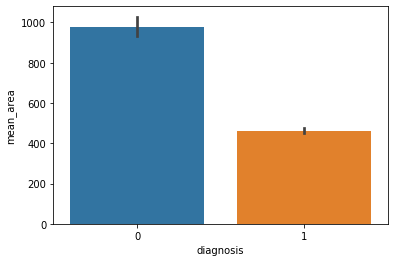

In [11]:
# feature mean area
sns.barplot(x=data['diagnosis'], y=data['mean_area'], data=data)

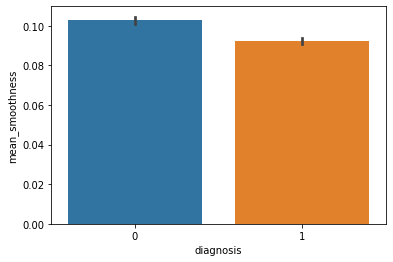

In [12]:
# feature mean smoothness
sns.barplot(x=data['diagnosis'], y=data['mean_smoothness'], data=data)

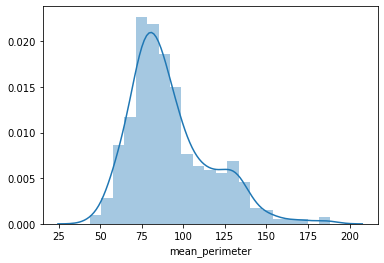

In [15]:
sns.distplot(data['mean_perimeter'])
## distribution from 45 to 185

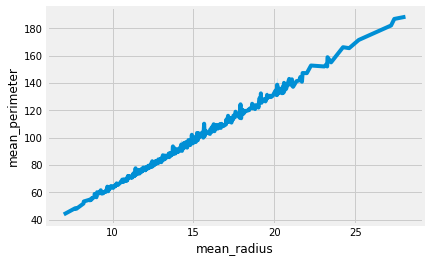

In [88]:
# relation between mean_radius and mean_perimeter
sns.lineplot(x=data['mean_radius'], y=data['mean_perimeter'], data=data)

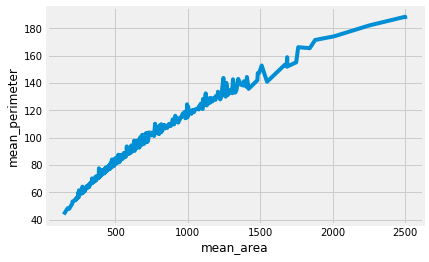

In [89]:
# relation between mean_area and mean_perimeter
sns.lineplot(x=data['mean_area'], y=data['mean_perimeter'], data=data)

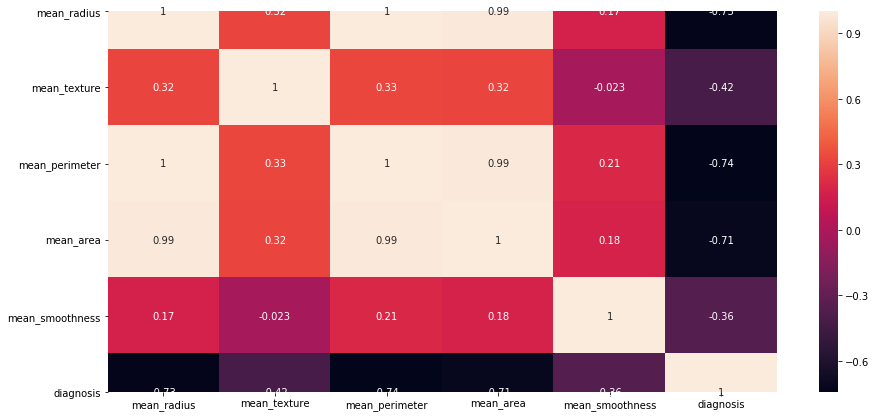

In [14]:
##checking for correlation
cor_mat=data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat, annot=True)

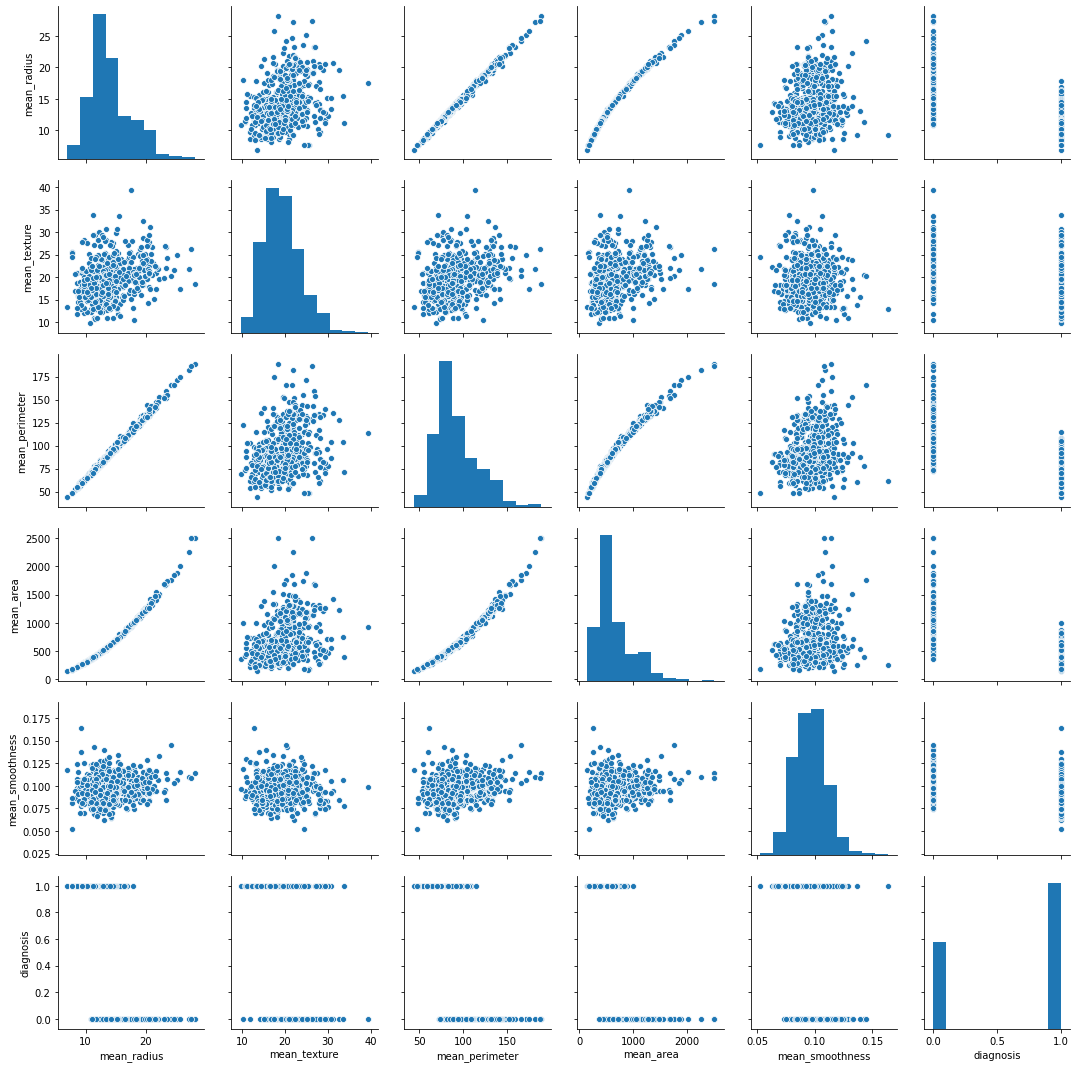

In [16]:
## checking for pairplot
sns.pairplot(data)
## we can see how different parameters correlate like texture and area don't have anything relative they are scattered and 
##while radius and perimeter have many things in common

In [92]:

sc=StandardScaler()
list_models=[]
list_scores=[]
x_train=sc.fit_transform(x_train)
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
pred_1=lr.predict(sc.transform(x_test))
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)
list_models.append('LogisticRegression')


C:\Users\khandelwal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [93]:
score_1

0.9210526315789473

In [94]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(sc.transform(x_test))
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)
    

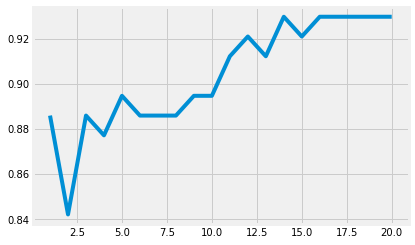

In [95]:
sns.lineplot(x=list(range(1,21)),y=list_1)
    

In [96]:
list_scores.append(max(list_1))
list_models.append('KNeighbors Classifier')


In [97]:
print(max(list_1))

0.9298245614035088


In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(sc.transform(x_test))
score_2=accuracy_score(y_test,pred_2)
list_models.append('Randomforest Classifier')
list_scores.append(score_2)

C:\Users\khandelwal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [99]:
score_2

0.9122807017543859

In [100]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(sc.transform(x_test))
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('Support vector machines')

In [101]:
score_3

0.8947368421052632

In [104]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_4=xgb.predict(sc.transform(x_test))
score_4=accuracy_score(y_test,pred_4)
list_models.append('XGboost')
list_scores.append(score_4)

In [105]:
score_4

0.9298245614035088

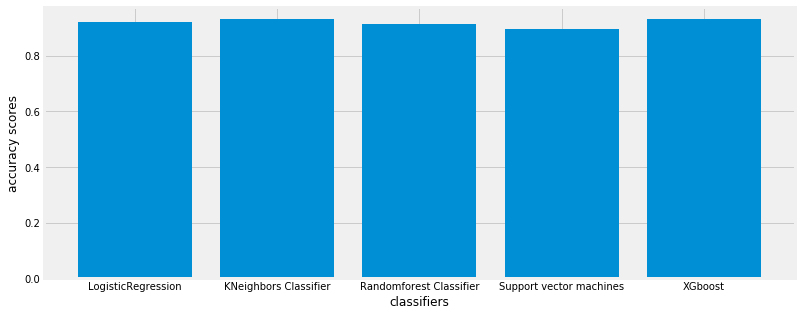

In [106]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()